# Task2 Amplitude Modulation 

## 1.import libraries
### to download thinkdsp.py, I referenced https://github.com/AllenDowney/ThinkDSP/blob/master/code/chap02soln.ipynb

In [1]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import read_wave
from thinkdsp import decorate

## 2. read suspicious audio file

In [2]:
wave = read_wave('./Ex3_sound4.wav')

wave.make_audio()

## 2.1. to show the spectrum of original audio file

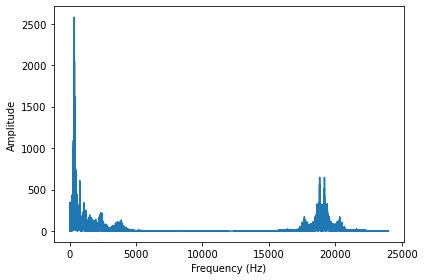

In [3]:
spectrum = wave.make_spectrum()

spectrum.plot()
decorate(xlabel='Frequency (Hz)')
decorate(ylabel='Amplitude')

## 3. to apply high pass filter to enable ultrasonic range of frequencies only

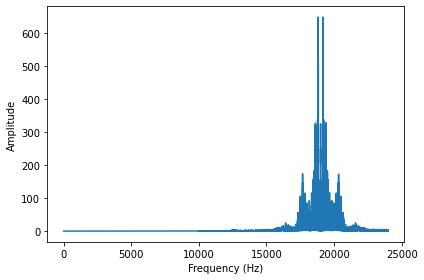

In [4]:
spectrum = wave.make_spectrum()

spectrum.high_pass(10000)

spectrum.plot()
decorate(xlabel='Frequency (Hz)')
decorate(ylabel='Amplitude')

## 4. to generate carrier signal
### carrier signal Frequency 19KHZ is selected by testing multiple frequncies from 15KHZ to 25KZH to find hidden messages.  

In [5]:
from thinkdsp import CosSignal

#carrier_sig = CosSignal(freq=15000)
carrier_sig = CosSignal(freq=19000)

carrier_wave = carrier_sig.make_wave(duration=wave.duration, framerate=wave.framerate)

## 5. demoduation
### the original wav file was modulated to hide messages, we have to demodulate original signal.

In [6]:
modulated = spectrum.make_wave()
carrier_wave = carrier_sig.make_wave(duration=modulated.duration, framerate=modulated.framerate)

demodulated = modulated * carrier_wave

## 5.1. to show the demodulated signal
### there are two frequency groups in demodulated signal. i will apply low pass filter to enable message frequency group only

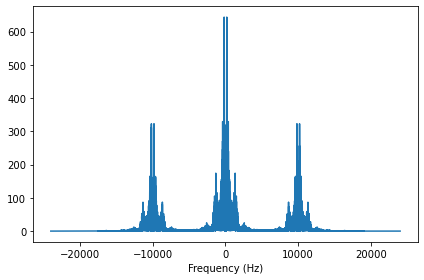

In [7]:
demodulated_spectrum = demodulated.make_spectrum(full=True)
demodulated_spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [8]:
## 5.2 listen to the demodulated signal

In [9]:
demodulated.make_audio()

## 6. to apply low pass filter to activate hidden messages only
### low pass filter frequency 5KHZ is selected by testing multiple frequencies to play hidden messages clearly

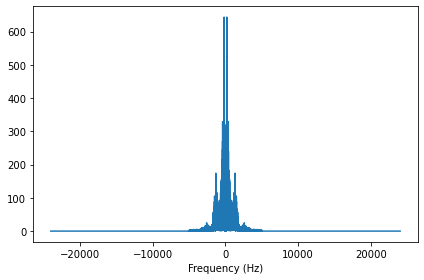

In [10]:
#demodulated_spectrum.low_pass(15000)
#demodulated_spectrum.low_pass(9000)
#demodulated_spectrum.low_pass(8000)
demodulated_spectrum.low_pass(5000)

demodulated_spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## 7. play the secret code
## the secret code is "1891"

In [11]:
filtered = demodulated_spectrum.make_wave()
filtered.make_audio()